In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [3]:
df = pd.read_csv('amazon.csv', encoding='latin1')
df.tail()

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


In [6]:
df.drop('date', axis=1, inplace=True)
df.tail()


,year,state,month,number
6449,2012,Tocantins,Dezembro,128.0
6450,2013,Tocantins,Dezembro,85.0
6451,2014,Tocantins,Dezembro,223.0
6452,2015,Tocantins,Dezembro,373.0
6453,2016,Tocantins,Dezembro,119.0


In [4]:
df.month.replace('Janeiro', 'January',inplace=True)
df.month.replace('Fevereiro','February',inplace=True)
df.month.replace('Março','March',inplace=True)
df.month.replace('Abril','April',inplace=True)
df.month.replace('Maio','May',inplace=True)
df.month.replace('Junho','June',inplace=True)
df.month.replace('Julho','July',inplace=True)
df.month.replace('Agosto','August',inplace=True)
df.month.replace('Setembro','September',inplace=True)
df.month.replace('Outubro','October',inplace=True)
df.month.replace('Novembro','November',inplace=True)
df.month.replace('Dezembro','December',inplace=True)
df.tail()

,year,state,month,number,date
6449,2012,Tocantins,December,128.0,2012-01-01
6450,2013,Tocantins,December,85.0,2013-01-01
6451,2014,Tocantins,December,223.0,2014-01-01
6452,2015,Tocantins,December,373.0,2015-01-01
6453,2016,Tocantins,December,119.0,2016-01-01


In [5]:
df['number'].describe() #STATICAL FORM OF THE DATA


count    6454.000000
mean      108.293163
std       190.812242
min         0.000000
25%         3.000000
50%        24.000000
75%       113.000000
max       998.000000
Name: number, dtype: float64

In [9]:
print('Max number of registered fires in a month: ',df['number'].max())
print('State: ',df[df['number'] ==  df['number'].max()]['state'].iloc[0])
print('Month: ',df[df['number'] ==  df['number'].max()]['month'].iloc[0])
print('Year: ',df[df['number'] ==  df['number'].max()]['year'].iloc[0])

Max number of registered fires in a month:  998.0
State:  Amazonas
Month:  September
Year:  2008


Worst months: 
August
July
November
October


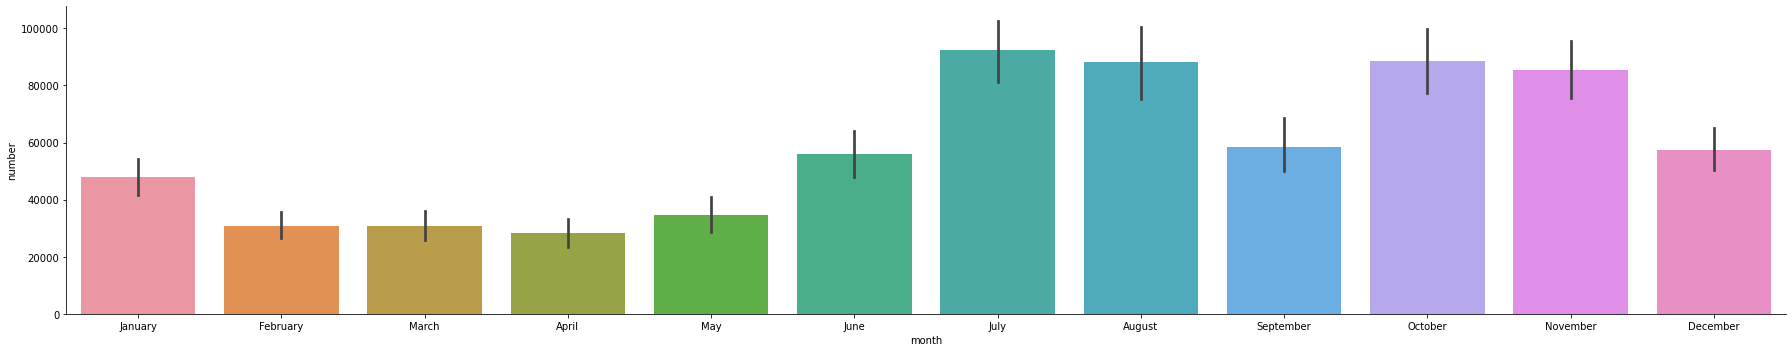

In [10]:
fire = df.groupby(['month'], as_index=False).sum() 
fire.drop('year',axis=1, inplace=True)

cacl= fire[fire['number']>fire['number'].mean()+fire['number'].std()]
print('Worst months: ')
for i in range(len(cacl)):
    print(cacl['month'].values[i])

sns.catplot(x='month', y='number', kind='bar',data=df[['month','number']], aspect=5, estimator=sum);

Worst states: 
Mato Grosso
Paraiba
Sao Paulo


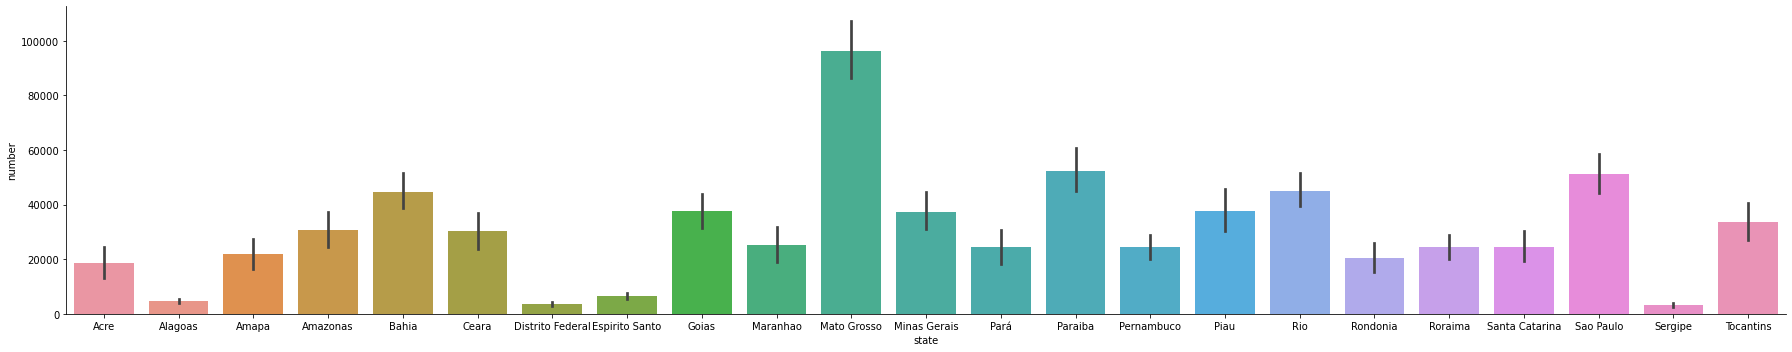

In [11]:
fire_state = df.groupby(['state'], as_index=False).sum()
fire_state.drop('year',axis=1, inplace=True)


sns.catplot(x='state', y='number',data=df[['state','number']], kind='bar', aspect=5, estimator=sum);

cacl_state = fire_state[fire_state['number']> fire_state['number'].mean() +fire_state['number'].std()]
print('Worst states: ')
for i in range(len(cacl_state)):
    print(cacl_state['state'].values[i])

Worst years: 
2003
2015
2016


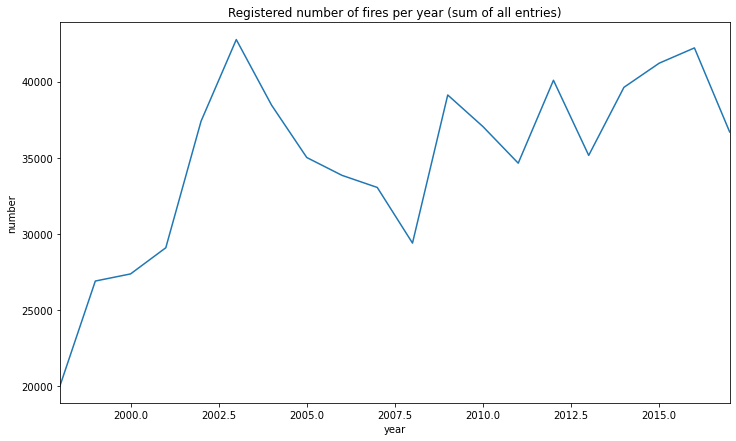

In [12]:
fire_year = df.groupby(['year'], as_index=False).sum() 

cacl_year = fire_year[fire_year['number']>fire_year['number'].mean() + fire_year['number'].std()]
print('Worst years: ')
for i in range(len(cacl_year)):
    print(cacl_year['year'].values[i])


plt.figure(figsize=[12,7])
plt.xlim([1998, 2017])
plt.title('Registered number of fires per year (sum of all entries)')
sns.lineplot(x='year', y='number',data=fire_year);


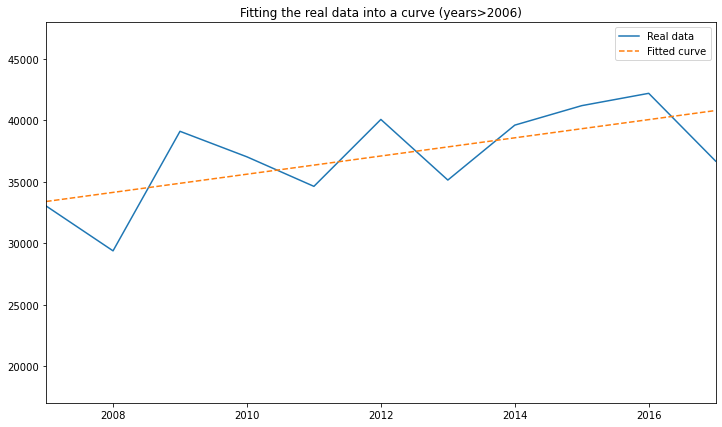

In [13]:
model = fire_year[fire_year['year']>2006]
poly = np.polyfit(model['year'],model['number'],1)
z = np.poly1d(poly)
    
year = np.linspace(2007, 2017, 11)

plt.figure(figsize=[12,7])
plt.plot(year, model['number'], '-', label='Real data') 
plt.plot(year,z(year), '--', label='Fitted curve')
plt.xlim([2007, 2017])
plt.ylim([17000, 48000])
plt.title('Fitting the real data into a curve (years>2006)')
plt.legend()
plt.show()

In [14]:
for i in range(2022,2029,1):
    print(i, '->', math.trunc(z(i)))

2022 -> 44517
2023 -> 45258
2024 -> 45999
2025 -> 46740
2026 -> 47481
2027 -> 48223
2028 -> 48964
